<a href="https://colab.research.google.com/github/kimjh0607/Deep_Learning/blob/main/TensorflowTTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorflowTTS real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using TensorflowTTS for Korea (Using KSS dataset)

- Github: https://github.com/TensorSpeech/TensorflowTTS
- Colab for Eng: https://colab.research.google.com/drive/1akxtrLZHKuMiQup00tzO2olCaN-y3KiD?usp=sharing

## Install

In [6]:
!pip show tensorflow

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [12]:
import tensorflow_tts
print(tensorflow_tts.__version__)

0.0


In [ ]:
!pip install tensorflowtts
!pip show tensorflowtts

In [ ]:
!pip install jamo

In [ ]:
!pip install unidecode

In [ ]:
!pip install tensorflow-addons

In [ ]:
!pip install pypinyin

In [ ]:
!pip install g2p_en

In [ ]:
!pip install pyopenjtalk

In [28]:
from jamo import h2j, hangul_to_jamo, j2h, jamo_to_hcj
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor


In [29]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS.git
os.chdir("TensorFlowTTS")
!pip install .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

fatal: destination path 'TensorFlowTTS' already exists and is not an empty directory.
Processing /content/TensorFlowTTS
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflowtts to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.7.0 (from tensorflowtts) (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.7.0


In [5]:
!pip install tensorflowtts==2.8.0
!pip show tensorflowtts

ERROR: Could not find a version that satisfies the requirement tensorflowtts==2.8.0 (from versions: 0.7, 0.8, 0.9, 0.11, 1.1, 1.6, 1.6.1, 1.8)
ERROR: No matching distribution found for tensorflowtts==2.8.0


In [30]:
!pip install git+https://github.com/repodiac/german_transliterate.git#egg=german_transliterate
!pip install h5py==2.10.0

  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-_mzhqeki/german-transliterate_553eb31eb1414d349ffc562489944de1
  Running command git clone --filter=blob:none --quiet https://github.com/repodiac/german_transliterate.git /tmp/pip-install-_mzhqeki/german-transliterate_553eb31eb1414d349ffc562489944de1
  Resolved https://github.com/repodiac/german_transliterate.git to commit 4e01beba5f19adb9ccd72d0607a81f4ed7f6ee87
  Preparing metadata (setup.py) ... done
  Using cached num2words-0.5.13-py3-none-any.whl (143 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for german_transliterate: filename=german_transliterate-0.1.3-py3-none-any.whl size=20814 sha256=9b01aeedf124fcf4cf2ba1c56972403469ffadf4be509d1cdf7dfde753ec856e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tqzty5by/wheels/4a/bf/cf/11ee370bc943cab5154f97525ea44141abfe4402276f678d3e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-a

## Load Model

In [31]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

### (a) Tacotron 2

In [32]:
tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-kss-ko", name="tacotron2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


model.h5:   0%|          | 0.00/128M [00:00<?, ?B/s]

config.yml:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

### (b) FastSpeech2

In [33]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-kss-ko", name="fastspeech2")

model.h5:   0%|          | 0.00/125M [00:00<?, ?B/s]

config.yml:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

### (c) Multi-band MelGAN

In [34]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-kss-ko", name="mb_melgan")

model.h5:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

config.yml:   0%|          | 0.00/5.82k [00:00<?, ?B/s]

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [35]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-kss-ko")

processor.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

In [36]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [40]:
input_text = "딥러닝 프로젝트 1조 입니다. 이번 프로젝트가 잘 마무리 되었으면 좋겠습니다."

In [38]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MB-MELGAN

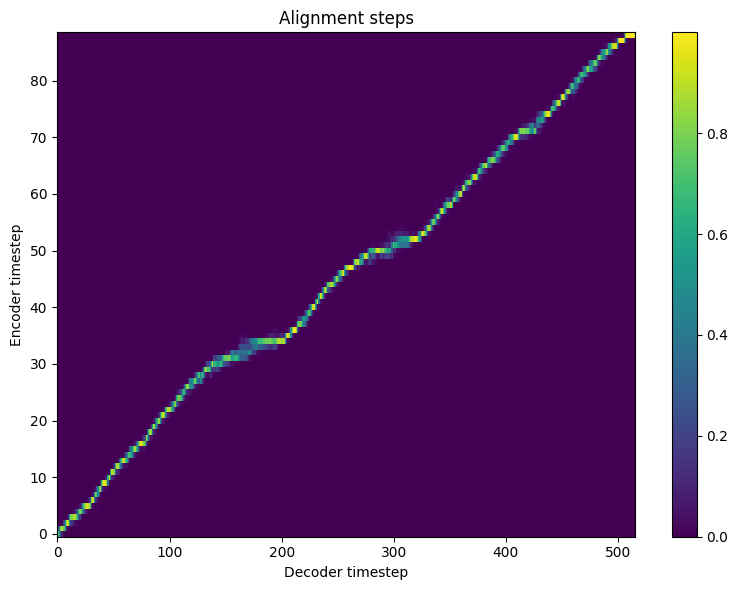

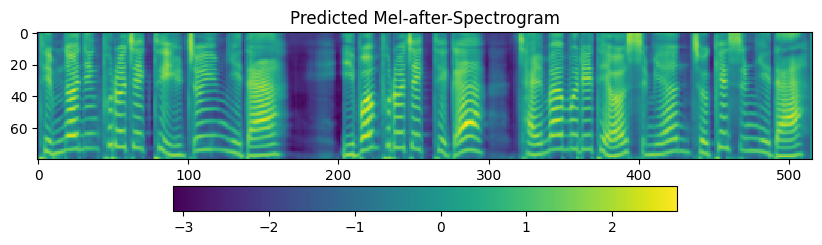

In [41]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (b) FastSpeech2 + MB-MELGAN

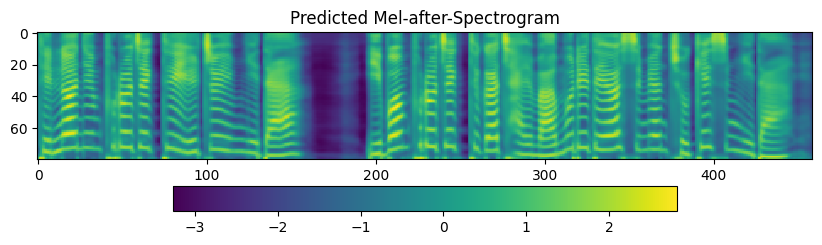

In [42]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)